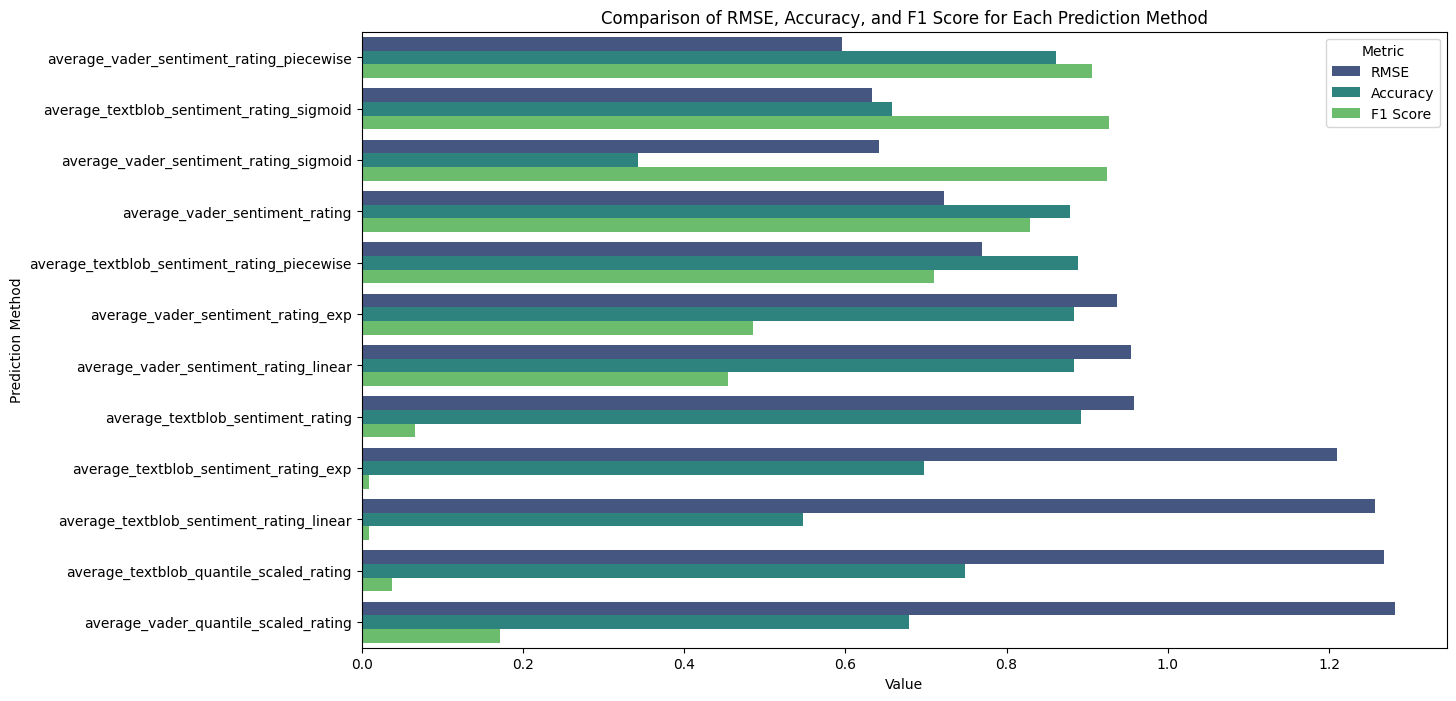

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Function to calculate accuracy
def calculate_accuracy(actual, predicted):
    return accuracy_score(actual, predicted)

# Function to categorize ratings into bins
def categorize_ratings(ratings):
    bins = [0, 1, 2, 3, 4, 5]
    labels = [0, 1, 2, 3, 4]
    categories = pd.cut(ratings, bins=bins, labels=labels, include_lowest=True)
    return categories.astype(int)

# Function to calculate F1 score for categorized ratings
def calculate_f1_scores(data, prediction_columns, actual_column):
    categorized_actual = categorize_ratings(data[actual_column])
    f1_scores = {}
    for col in prediction_columns:
        categorized_predicted = categorize_ratings(data[col])
        f1 = f1_score(categorized_actual, categorized_predicted, average='weighted')
        f1_scores[col] = f1
    return f1_scores

# Load the data
file_path = '/content/combined_ratings_by_course (4).csv'
data = pd.read_csv(file_path)

# Prediction columns
prediction_columns = [
    'average_vader_sentiment_rating', 'average_vader_sentiment_rating_linear', 'average_vader_sentiment_rating_piecewise',
    'average_vader_sentiment_rating_exp', 'average_vader_quantile_scaled_rating', 'average_vader_sentiment_rating_sigmoid',
    'average_textblob_sentiment_rating', 'average_textblob_sentiment_rating_linear', 'average_textblob_sentiment_rating_piecewise',
    'average_textblob_sentiment_rating_exp', 'average_textblob_quantile_scaled_rating', 'average_textblob_sentiment_rating_sigmoid'
]

# Calculate RMSE, Accuracy, and F1 scores
evaluation_metrics = {}
for col in prediction_columns:
    rmse = calculate_rmse(data['average_actual_rating'], data[col])
    accuracy = calculate_accuracy(data['average_actual_rating'].astype(int), data[col].round().astype(int))
    f1 = calculate_f1_scores(data, [col], 'average_actual_rating')[col]
    evaluation_metrics[col] = {'RMSE': rmse, 'Accuracy': accuracy, 'F1 Score': f1}

# Convert to DataFrame and sort
metrics_df = pd.DataFrame.from_dict(evaluation_metrics, orient='index').reset_index()
metrics_df.rename(columns={'index': 'Method'}, inplace=True)
metrics_df_sorted = metrics_df.sort_values(by=['RMSE', 'Accuracy', 'F1 Score'], ascending=[True, False, False])

# Save to CSV
metrics_df_sorted.to_csv('/content/evaluation_metrics_sorted.csv', index=False)

# Melt DataFrame for plotting
metrics_df_melted = pd.melt(metrics_df_sorted, id_vars=['Method'], value_vars=['RMSE', 'Accuracy', 'F1 Score'])

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=metrics_df_melted, x='value', y='Method', hue='variable', palette='viridis')
plt.title('Comparison of RMSE, Accuracy, and F1 Score for Each Prediction Method')
plt.xlabel('Value')
plt.ylabel('Prediction Method')
plt.legend(title='Metric')
plt.show()

